<a href="https://colab.research.google.com/github/Rishika-03/my_data_repo/blob/main/Udemy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as path

In [ ]:
udemy_course_des=pd.read_csv('/udemy_courses.csv')
udemy_course_des.tail(5) 

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [ ]:
udemy_course_des.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [ ]:
udemy_course_des['published_timestamp'] = pd.to_datetime(udemy_course_des['published_timestamp'])
udemy_course_des['level'] = udemy_course_des['level'].astype('category')
udemy_course_des['level'] = udemy_course_des['level'].cat.codes
udemy_course_des['is_paid'] = udemy_course_des['is_paid'].astype('category')
udemy_course_des['is_paid'] = udemy_course_des['is_paid'].cat.codes
udemy_course_des

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [ ]:
udemy_course_des.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [ ]:
udemy_course_des['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [ ]:
udemy_course_des_csv=udemy_course_des.to_csv("udem_course_des_for_bq.csv")


In [ ]:
path('udemy_course_des.db').touch()
udemy_conn=sqlite3.connect('udemy_course_des.db')
udemy_cursor=udemy_conn.cursor()

In [ ]:
udemy_course_des.to_sql("udemy_course_des",udemy_conn,if_exists='append',index= False)

In [ ]:
udemy_des_init_query = pd.read_sql(''' SELECT * FROM udemy_course_des ''', udemy_conn)
udemy_des_init_query

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [ ]:
data_query = pd.read_sql(''' SELECT course_title, price, content_duration, num_subscribers
                                      FROM udemy_course_des
                                      WHERE subject == 'Web Development'
                                      ORDER BY price DESC LIMIT 15 ''', udemy_conn)
data_query

,course_title,price,content_duration,num_subscribers
0,Web Development Masterclass - Complete Certifi...,200,19.5,4090
1,Learn JavaScript for beginners,200,1.5,15276
2,Ultimate Web Developer Course Build 10 Website...,200,32.5,9359
3,Rapid Website Design with Bootstrap,200,1.0,14842
4,Git a Web Developer Job: Mastering the Modern ...,200,15.0,5809
5,Advanced Javascript,200,3.5,6601
6,Complete Codeigniter: From Beginner to Advanced,200,3.0,2786
7,Complete React JS web developer with ES6 - Bui...,200,12.0,952
8,Dynamic JavaScript Master Class AJAX JSON Simp...,200,4.5,9773
9,Angular 2 & TypeScript Beginner Web Development,200,19.5,5211


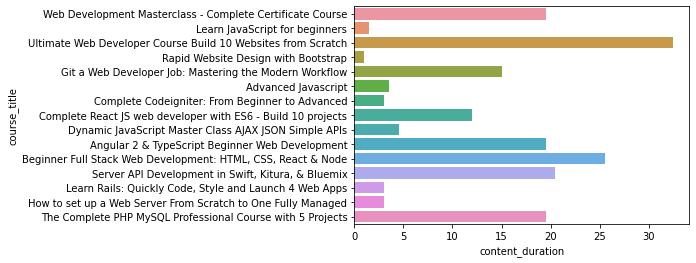

In [ ]:
sns.barplot(x='content_duration',y='course_title',data= data_query)

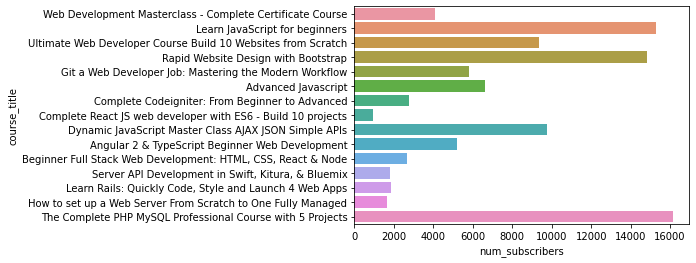

In [ ]:
sns.barplot(x='num_subscribers',y='course_title',data= data_query)

In [ ]:
data_query.mean()

<ipython-input-17-b9a0e2f6909a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_query.mean()


price                200.000000
content_duration      12.233333
num_subscribers     6592.866667
dtype: float64

In [ ]:
data_analysis_finance = pd.read_sql(''' SELECT course_title, price, content_duration, num_subscribers
                                       FROM udemy_course_des
                                       WHERE course_title LIKE '%Finance'
                                       ORDER BY price DESC  ''', udemy_conn)
data_analysis_finance

,course_title,price,content_duration,num_subscribers
0,Take Your Career to the Next Level with MBA Fi...,50,2.000000,618
1,Level 1 2014 CFA® Program – Corporate Finance,40,3.000000,204
2,QuickBooks Online : Inventory Management For N...,35,0.666667,8
3,Basics of Business Finance,30,4.000000,4855
4,CFA: Fast Track your career in Finance,20,2.000000,1393
5,Learn and Master the Basics of Finance,20,3.000000,43
6,Practical Finance,20,1.000000,4497
7,Introduction To The World Of Equity Finance,20,2.000000,29
8,Surviving Introduction to Finance,0,3.000000,1362


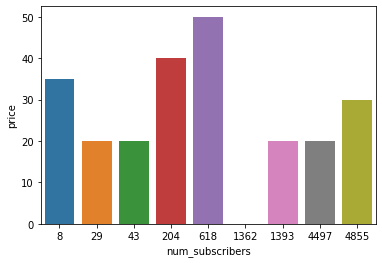

In [ ]:
sns.barplot(x = 'num_subscribers', y = 'price', data = data_analysis_finance)

In [ ]:
data_analysis_tot = pd.read_sql(''' SELECT SUM(num_subscribers) AS total_enrollments, COUNT(course_title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM udemy_course_des 
                                    WHERE subject == 'Graphic Design'
                                    ORDER BY price DESC ''', udemy_conn)
data_analysis_tot

,total_enrollments,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,1063148,603,57.827529,0,200


In [ ]:
data_analysis_tot = pd.read_sql(''' SELECT SUM(num_subscribers) AS total_enrollments, COUNT(course_title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM udemy_course_des 
                                    WHERE subject == 'Musical Instruments'
                                    ORDER BY price DESC ''', udemy_conn)
data_analysis_tot

,total_enrollments,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,846689,680,49.558824,0,200


In [ ]:
data_analysis_total = pd.read_sql(''' SELECT SUM(num_subscribers) AS total_enrollments, COUNT(course_title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM udemy_course_des 
                                    ORDER BY price DESC ''', udemy_conn)
data_analysis_total

,total_enrollments,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,11759120,3678,66.049483,0,200


In [ ]:
by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM udemy_course_des) AS subject_pct
                             FROM udemy_course_des
                             GROUP BY subject
                             ORDER BY subject_pct DESC ''', udemy_conn)
by_subject

,subject,subject_count,subject_pct
0,Business Finance,1195,32
1,Web Development,1200,32
2,Musical Instruments,680,18
3,Graphic Design,603,16


In [ ]:
by_subject_csv = by_subject.to_csv('by_subject_csv.csv')

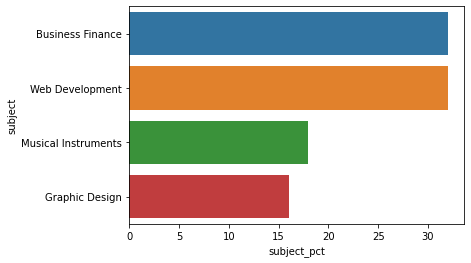

In [ ]:
sns.barplot(x = 'subject_pct', y = 'subject', data = by_subject)

In [ ]:
udemy_by_price = pd.read_sql(''' SELECT price, COUNT(price) AS price_count,
                           100 * COUNT(price) / (SELECT COUNT(*) FROM udemy_course_des) AS price_pct
                           FROM udemy_course_des
                           GROUP BY price
                           ORDER BY price_pct DESC LIMIT 10 ''', udemy_conn)
udemy_by_price

,price,price_count,price_pct
0,20,830,22
1,50,468,12
2,0,310,8
3,200,295,8
4,40,217,5
5,25,154,4
6,30,166,4
7,95,152,4
8,35,116,3
9,100,133,3


In [ ]:
udemy_price_pct_csv = udemy_by_price.to_csv('udemy_price_pct.csv')

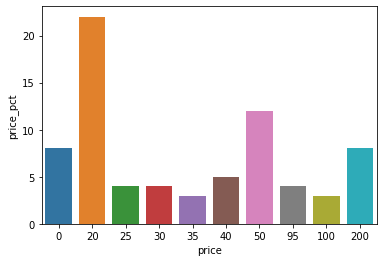

In [ ]:
sns.barplot(x = 'price', y = 'price_pct', data = udemy_by_price)

In [ ]:
by_subs_subject = pd.read_sql(''' SELECT course_title, subject, num_subscribers FROM udemy_course_des
                          GROUP BY subject
                          ORDER BY num_subscribers DESC ''', udemy_conn)

by_subs_subject

,course_title,subject,num_subscribers
0,Using MODX CMS to Build Websites: A Beginner's...,Web Development,901
1,Learn to trade Chart Patterns,Business Finance,75
2,Amazing Graphic Design for Beginners,Graphic Design,32
3,"Aprende a tocar jazz, salsa y blues en el piano",Musical Instruments,5


In [ ]:
subject_hundred = pd.read_sql(''' SELECT subject, AVG(price) as avg_price_subject
                                  FROM udemy_course_des
                                  WHERE price > 100.0 
                                  GROUP BY subject
                                  ORDER BY avg_price_subject DESC LIMIT 10 ''' , udemy_conn)
subject_hundred = subject_hundred.round(2)
subject_hundred

,subject,avg_price_subject
0,Business Finance,177.59
1,Web Development,175.26
2,Graphic Design,174.53
3,Musical Instruments,168.88


In [34]:
tot_price = pd.read_sql(''' SELECT subject, num_subscribers, SUM(num_subscribers) AS sum_sub, AVG(price) AS avg_course_price, SUM(price) AS total_revenue
                                           FROM udemy_course_des
                                           GROUP BY subject
                                           ORDER BY sum_sub DESC ''', udemy_conn)
tot_price

,subject,num_subscribers,sum_sub,avg_course_price,total_revenue
0,Web Development,901,7980572,77.033333,92440
1,Business Finance,75,1868711,68.552301,81920
2,Graphic Design,32,1063148,57.827529,34870
3,Musical Instruments,5,846689,49.558824,33700


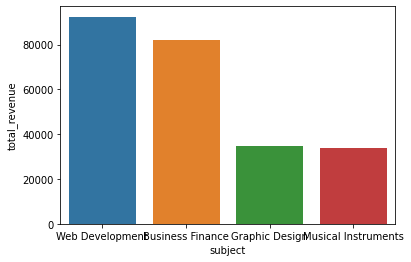

In [35]:
sns.barplot(x = 'subject', y = 'total_revenue', data = tot_price)

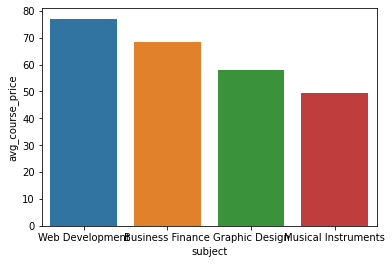

In [37]:
sns.barplot(x = 'subject', y = 'avg_course_price', data = tot_price)